In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
liste_E = [500, 1000, 1500, 3000]
liste_nu = [0.35, 0.41, 0.45]              #[0.35, 0.41, 0.45]
g=15

In [3]:
def lire_points_MPM(E,nu, glocal):
    nom_fich = "MPM-"  + "E" + str(int(E)) + "-nu" + "{:.2f}".format(nu) + "-g" + str(int(glocal))+ ".temoin"
    f_MPM = open(nom_fich, "r")
    points_MPM_X = []
    points_MPM_Y = []
    lines_MPM = f_MPM.readlines()
    for line in lines_MPM:
        lu = line[:-1]
        liste_lue = lu.split(" ")
        points_MPM_X.append(float(liste_lue[0]))
        points_MPM_Y.append(float(liste_lue[1]))
    return points_MPM_X, points_MPM_Y

In [4]:
def lire_points_FEM(E,nu, glocal):
    nom_fich = "FEM-"  + "E" + str(int(E)) + "-nu" + "{:.2f}".format(nu) + "-g" + str(int(glocal))+ ".temoin"
    f_FEM = open(nom_fich, "r")
    points_FEM_X = []
    points_FEM_Y = []
    lines_FEM = f_FEM.readlines()
    for line in lines_FEM:
        lu = line[:-1]
        liste_lue = lu.split(" ")
        points_FEM_X.append(float(liste_lue[0]))
        points_FEM_Y.append(float(liste_lue[1]))
    return points_FEM_X, points_FEM_Y

In [5]:
def lire_points_ABAQUS(E,nu, glocal):
    nom_fich = "ABAQUS-"  + "E" + str(int(E)) + "-nu" + "{:.2f}".format(nu) + "-g" + str(int(glocal))+ ".temoin"
    f_ABAQUS = open(nom_fich, "r")
    points_ABAQUS_X = []
    points_ABAQUS_Y = []
    lines_ABAQUS = f_ABAQUS.readlines()
    for line in lines_ABAQUS:
        lu = line   #[:-1]
        liste_lue = lu.split()         
        #print("lu 5:",liste_lue[5], " lu 6: ",liste_lue[6])
        points_ABAQUS_X.append(float(liste_lue[5]))
        points_ABAQUS_Y.append(float(liste_lue[6]))
    return points_ABAQUS_X, points_ABAQUS_Y

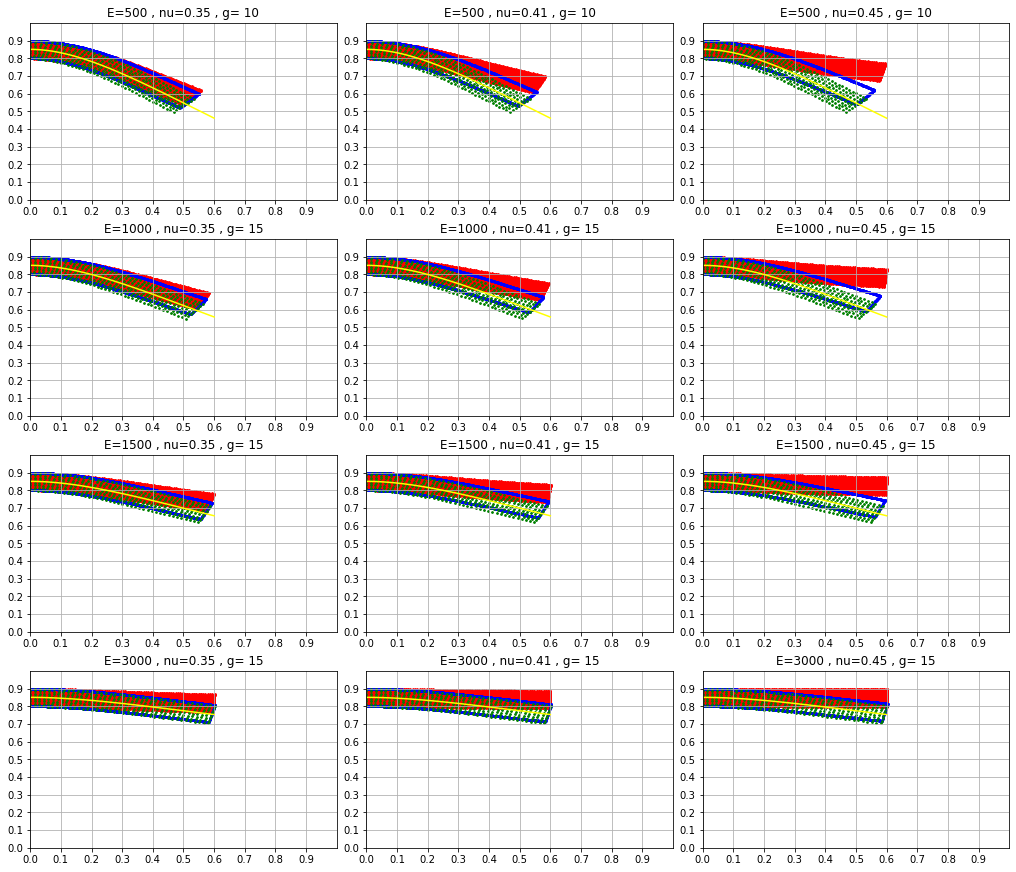

In [6]:
#fig, ax = plt.subplots(len(liste_E),len(liste_nu),figsize=(14, len(liste_E)*3), layout='constrained', squeeze=False)
fig, ax = plt.subplots(4,3,figsize=(14, 4*3), layout='constrained', squeeze=False)
for i,E in enumerate(liste_E):
    if E==500:
        gparam = 10
    else:
        gparam = g
    for j,nu in enumerate(liste_nu):
        points_FEM_X, points_FEM_Y = lire_points_FEM(E,nu, gparam)
        ax[i,j].scatter(points_FEM_X, points_FEM_Y, color='red', s=3)         
        
        points_MPM_X, points_MPM_Y = lire_points_MPM(E,nu, gparam)
        ax[i,j].scatter(points_MPM_X, points_MPM_Y, color='blue', s=3)
        
        points_ABAQUS_X, points_ABAQUS_Y = lire_points_ABAQUS(E,nu, gparam)
        ax[i,j].scatter(points_ABAQUS_X, [y + 0.8 for y in points_ABAQUS_Y], color='green', s=3)        
        
        ax[i,j].xaxis.set_ticks(np.arange(0, 1, 0.1))
        ax[i,j].yaxis.set_ticks(np.arange(0, 1, 0.1))
        ax[i,j].grid()
            
        ax[i,j].set_xlim(0,1)
        ax[i,j].set_ylim(0,1)     
        ax[i,j].set_title("E=" + str(E) + " , " + "nu=" + "{:.2f}".format(nu) + " , g= " + str(gparam))
        
        L=0.6
        h=0.1
        haut = 0.9
        x_analyt = np.linspace(0.0,L,100)
        K = gparam/(2*E*h**2)
        y_analyt = [haut - h/2 - K*(x**4 - 4*L*x**3 + 6*L**2*x**2) for x in x_analyt]
        ax[i,j].plot(x_analyt, y_analyt, color="yellow")       

In [13]:
2**2*3

12

In [12]:
[i for i in interX]

[0.0,
 0.06666666666666667,
 0.13333333333333333,
 0.2,
 0.26666666666666666,
 0.3333333333333333,
 0.4,
 0.4666666666666667,
 0.5333333333333333,
 0.6,
 0.0,
 0.06666666666666667,
 0.13333333333333333,
 0.2,
 0.26666666666666666,
 0.3333333333333333,
 0.4,
 0.4666666666666667,
 0.5333333333333333,
 0.6]

In [15]:
Gamma = [2.5e-5, 5e-5, 2.5e-4, 5e-4, 2.5e-3, 5e-3, 2.5e-2]

In [16]:
ratio_la_h_article = [24, 21, 16, 15, 9, 7, 6]    

In [46]:
nbre_la = [6, 6, 7, 8, 10, 12, 16]

In [47]:
ratio_la_h = [((1/la)/0.02) for la in nbre_la]
ratio_la_h

[8.333333333333332,
 8.333333333333332,
 7.142857142857142,
 6.25,
 5.0,
 4.166666666666666,
 3.125]

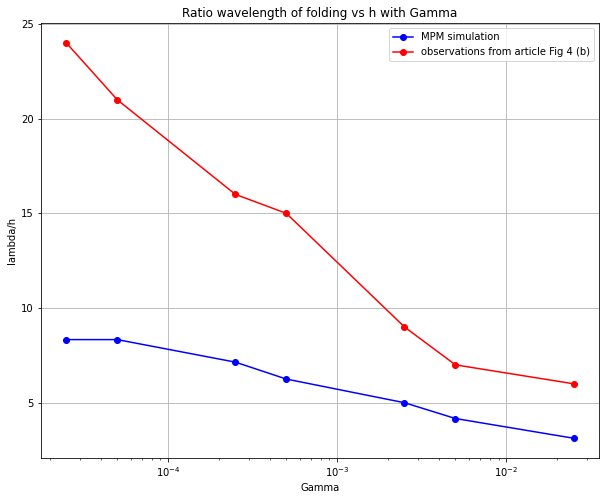

In [54]:
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(Gamma, ratio_la_h, 'o', linestyle='-', color = "blue", label='MPM simulation' )
plt.plot(Gamma, ratio_la_h_article , 'o', linestyle='-', color = "red", label='observations from article Fig 4 (b)')
plt.xscale("log")
plt.xlabel("Gamma")
plt.ylabel("lambda/h")
plt.title("Ratio wavelength of folding vs h with Gamma")
plt.grid()
plt.legend()